# Projeto Banco de Dados I

## Análise Exploratória de Dados Utilizando SQL e Python

### O objetivo deste projeto é realizar uma análise exploratória de dados utilizando a linguagem SQL. Faremos uso de um dataset de nossa preferência, o qual será armazenado em um banco de dados PostgreSQL. Posteriormente, iremos estabelecer uma conexão com Python para executar as queries necessárias.
### Para esta tarefa, utilizaremos o Jupyter Notebook para conduzir nossa análise descritiva, onde responderemos  algumas questões como:
- Qual é a tipagem das colunas?
- Quantos valores nulos temos em cada coluna?
- Quantos valores únicos temos nas colunas categóricas?
- Responderemos outras perguntas necessárias para entender o dataset escolhido.

## Datasets:
#### Amazon Top 50 Bestselling Books 2009 - 2022
- Descrição do Dataset:
    - Este conjunto de dados compila informações sobre os 50 livros mais vendidos na Amazon entre os anos de 2009 e 2022. Ele oferece uma visão abrangente dos livros populares durante esse período, destacando detalhes como o título do livro, o autor, a avaliação média, o número de avaliações, o preço, o ano de publicação e o gênero.
- Disponível em: https://www.kaggle.com/datasets/chriskachmar/amazon-top-50-bestselling-books-2009-2022  

#### Books Dataset
- Descrição do Dataset:
    - Este conjunto de dados compreende informações coletadas do wonderbk.com, uma livraria online popular. O conjunto de dados contém detalhes de 103.063 livros, com atributos-chave como título, autores, descrição, categoria, editora, preço inicial e data de publicação.
- Disponível em: https://www.kaggle.com/datasets/elvinrustam/books-dataset

In [1]:
#Importação de bibliotecas

# Importando a biblioteca psycopg2 para interagir com bancos de dados PostgreSQL em Python
import psycopg2 as ps

#Importando a biblioteca pandas para manipulação e análise de dados
import pandas as pd 

# Importando a biblioteca SQLAlchemy para criar uma engine e interagir com bancos de dados SQL de forma flexível em Python
from sqlalchemy import create_engine
#------------------------------------------------------------------------------------------------------------------------------
# Caso tenha problemas ao se conectar com o PostgreSQL:
# Importe a biblioteca pandas:
# import pandas as pd
# Armazene seu DataFrame em um objeto Python usando a biblioteca pandas:
# df = pd.read_csv('dados.csv')

# Realize a importação da biblioteca pandasql para executar consultas SQL:
# import pandasql as pds

# Para utilizar comandos SQL em DataFrames pandas:
# pds.sqldf('SELECT * FROM df')

# Escreva suas consultas SQL:
# query = """
#     SELECT x,y,z
#     FROM df;
# """

# Execute sua consulta:
# pds.sqldf(query, locals())

In [2]:
# Credenciais do banco de dados
db_host = 'localhost' #endereço onde o banco de dados PostgreSQL está hospedado
db_port = '5432' #porta usada para se conectar ao banco de dados PostgreSQL
db_name = 'postgres' #nome do banco de dados PostgreSQL
db_user = 'postgres'  #nome de usuário usado para autenticar a conexão com o banco de dados
db_password = '****' #senha associada ao nome de usuário fornecido

# Conectando-se ao banco de dados e atribuindo a conexão a variável 'conn'
# Armazenar a conexão em uma variável facilita o uso subsequente da conexão para executar consultas e outras operações 
# no banco de dados.
try:
    conn = ps.connect(
        host=db_host,
        port=db_port,
        database=db_name,
        user=db_user,
        password=db_password
    )
    print('Conexão ao PostgreSQL bem-sucedida')
    
except ps.Error:
    print('Erro ao conectar ao PostgreSQL:')
    raise  # Levantando a exceção para interromper a execução do bloco no Jupyter Notebook

Conexão ao PostgreSQL bem-sucedida


In [3]:
# Construindo a string de conexão para o banco de dados PostgreSQL
# A string de conexão contém informações sobre o usuário, senha, host, porta e nome do banco de dados
db_string = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

# Criando a engine do SQLAlchemy
# A engine fornece uma interface para interagir com o banco de dados PostgreSQL
# A engine é construída a partir da string de conexão criada anteriormente
engine = create_engine(db_string)

## Criando a primeira tabela no banco de dados

###  Amazon Top 50 Bestselling Books 2009 - 2022
(https://www.kaggle.com/datasets/chriskachmar/amazon-top-50-bestselling-books-2009-2022)

### Obs.: Verificamos inicialmente que há um título de livro com 196 caracteres, por isto extendemos o limite da coluna Nome. 

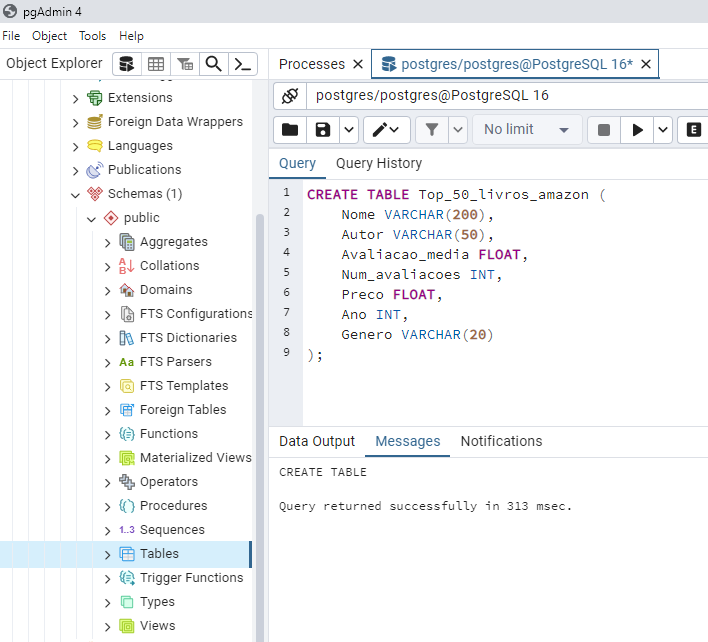



## Tabela com os dados
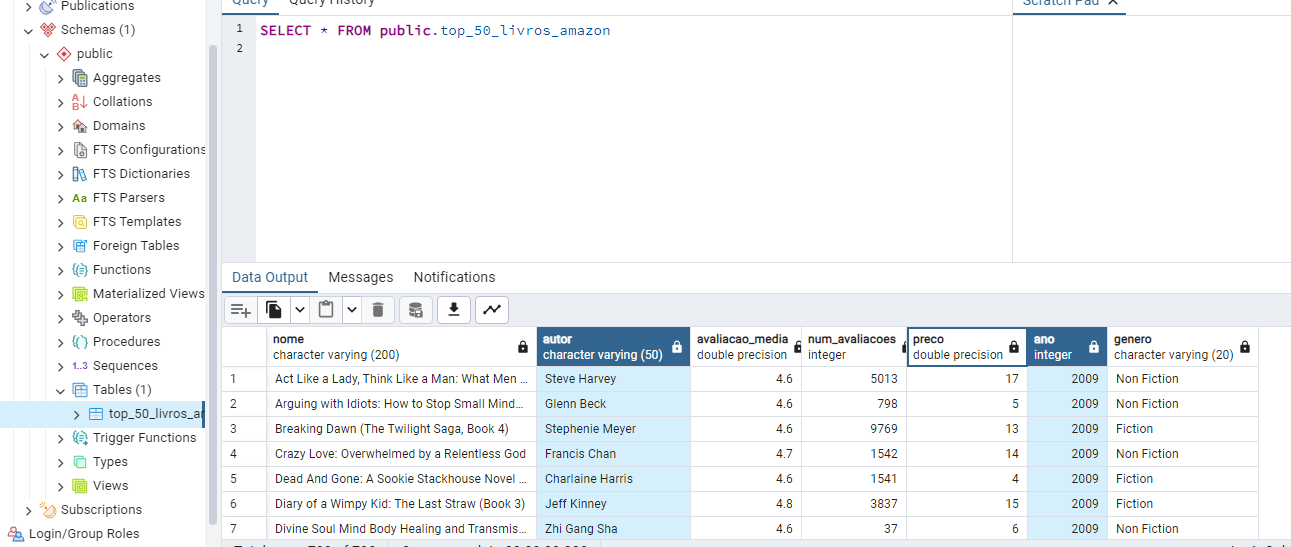

In [4]:
# Executando a consulta SQL usando a conexão SQLAlchemy
#Visão geral do dataset
pd.read_sql_query('SELECT * FROM top_50_livros_amazon', con=engine)

,nome,autor,avaliacao_media,num_avaliacoes,preco,ano,genero
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17.0,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5.0,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13.0,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14.0,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4.0,2009,Fiction
...,...,...,...,...,...,...,...
695,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,20920,9.0,2022,Fiction
696,Ugly Love: A Novel,Colleen Hoover,4.7,33929,10.0,2022,Fiction
697,Verity,Colleen Hoover,4.6,71826,11.0,2022,Fiction
698,What to Expect When You're Expecting,Heidi Murkoff,4.8,27052,13.0,2022,Non Fiction


### Verificando a tipagem de cada coluna:

In [5]:
#Verificando a tipagem das colunas
query = """SELECT column_name, data_type
FROM information_schema.columns
WHERE table_name = 'top_50_livros_amazon';"""
pd.read_sql_query(query, con = engine)

,column_name,data_type
0,num_avaliacoes,integer
1,avaliacao_media,double precision
2,preco,double precision
3,ano,integer
4,autor,character varying
5,genero,character varying
6,nome,character varying


- Tipagem das Colunas:
    - num_avaliacoes (Número de Avaliações): Este campo é representado como um tipo de dado inteiro;
    - avaliacao_media (Avaliação Média): Este campo é representado como um tipo de dado de precisão dupla (double precision), indicando que armazena valores numéricos com precisão decimal;
    - preco (Preço): Este campo também é representado como um tipo de dado de precisão dupla (double precision);
    - ano (Ano): Este campo é representado como um tipo de dado inteiro, armazenando valores numéricos inteiros que indicam o ano de publicação de cada livro.
    -  autor (Autor): Este campo é representado como um tipo de dado de caractere variável (character varying), o que significa que pode armazenar uma variedade de caracteres, permitindo nomes de autores de diferentes comprimentos.
    - genero (Gênero): Este campo também é representado como um tipo de dado de caractere variável (character varying), permitindo a representação de diferentes gêneros com nomes de comprimento variável.
    - nome (Nome): Finalmente, o campo do título do livro é representado como um tipo de dado de caractere variável (character varying), permitindo a inclusão de títulos de diferentes comprimentos.

### Verificando os valores nulos:

In [6]:
#Selecionando primeiramente o nome das colunas
query_colunas  = """ SELECT column_name
FROM information_schema.columns
WHERE table_name = 'top_50_livros_amazon';"""
colunas = pd.read_sql_query(query_colunas, con = engine)
colunas

,column_name
0,num_avaliacoes
1,avaliacao_media
2,preco
3,ano
4,autor
5,genero
6,nome


In [7]:
# Colocando os nomes das colunas em uma lista
colunas = list(colunas['column_name'])
colunas

['num_avaliacoes',
 'avaliacao_media',
 'preco',
 'ano',
 'autor',
 'genero',
 'nome']

In [8]:
# Iterando sobre as colunas para verificar a quantidade de nulos por coluna:
for coluna in colunas:
    query = f""" SELECT COUNT(*) 
    AS quant_nulos_{coluna}
    FROM top_50_livros_amazon
    WHERE {coluna} IS NULL;"""
        
    #Armazendo cada resultado em uma variável
    resultado_coluna = pd.read_sql_query(query, con=engine)
    print(f'{resultado_coluna.to_string(index=False)}')     

 quant_nulos_num_avaliacoes
                          0
 quant_nulos_avaliacao_media
                           0
 quant_nulos_preco
                 0
 quant_nulos_ano
               0
 quant_nulos_autor
                 0
 quant_nulos_genero
                  0
 quant_nulos_nome
                0


- Não há nenhum valor nulo em nenhuma das colunas do conjunto de dados. Isso é confirmado pelos resultados acima, que mostram que a quantidade de valores nulos é zero para cada coluna:

    - Número de Valores Nulos em 'num_avaliacoes': 0
    - Número de Valores Nulos em 'avaliacao_media': 0
    - Número de Valores Nulos em 'preco': 0
    - Número de Valores Nulos em 'ano': 0
    - Número de Valores Nulos em 'autor': 0
    - Número de Valores Nulos em 'genero': 0
    - Número de Valores Nulos em 'nome': 0

### Verificando os valores únicos por coluna:

In [9]:
# Iterando sobre as colunas
for coluna in colunas:
    query = f""" SELECT COUNT(DISTINCT {coluna}) 
    AS valores_unicos_{coluna}
    FROM top_50_livros_amazon;"""
        
    #Armazendo cada resultado em uma variável
    resultado_coluna = pd.read_sql_query(query, con=engine)
    print(f'{resultado_coluna.to_string(index=False)}')    

 valores_unicos_num_avaliacoes
                           462
 valores_unicos_avaliacao_media
                             14
 valores_unicos_preco
                   40
 valores_unicos_ano
                 14
 valores_unicos_autor
                  305
 valores_unicos_genero
                     2
 valores_unicos_nome
                 441


- Número de Avaliações: Existem 462 valores únicos.
- Avaliação Média: Observamos 14 valores únicos.
- Preço: Encontramos 40 valores únicos.
- Ano de Publicação: Há 14 anos únicos representados em nossos dados.
- Autor: Temos registros de 305 autores únicos.
- Gênero: A variável gênero possui apenas 2 valores únicos, indicando uma divisão clara entre dois tipos de gênero.
- Nome do Livro: Identificamos 441 nomes de livros únicos.

### É importante notar que, dado o tamanho do conjunto de dados - com cerca de 700 linhas - alguns autores e livros podem se repetir.

# Perguntas:

## 1 - Quais os autores aparecem mais de uma vez:

In [10]:
query = """SELECT autor, 
COUNT(*) AS quantas_citacoes
FROM top_50_livros_amazon
GROUP BY autor
HAVING COUNT(*) > 1
ORDER BY quantas_citacoes DESC
LIMIT 10;"""

pd.read_sql_query(query, con = engine)

,autor,quantas_citacoes
0,Jeff Kinney,14
1,Gary Chapman,14
2,Suzanne Collins,12
3,Rick Riordan,11
4,American Psychological Association,11
5,Dr. Seuss,10
6,Eric Carle,10
7,Gallup,9
8,Dav Pilkey,9
9,Don Miguel Ruiz,9


### Neste levantamento de autores mais citados, são destacados autores que abrangem gêneros que vão desde literatura infantil até ficção científica, passando por autoajuda e guias acadêmicos.
- Jeff Kinney, empatado no topo com 14 citações, é amplamente conhecido por sua série "Diário de um Banana";
- Gary Chapman, também com 14 citações, é reconhecido por seu livro "As Cinco Linguagens do Amor";
- Suzanne Collins, com 12 citações, é a autora da aclamada trilogia "Jogos Vorazes";
- Rick Riordan, com 11 citações, é famoso por sua série "Percy Jackson & Os Olimpianos";
- A American Psychological Association, também com 11 citações, é conhecida pelo seu Manual de Publicação da APA, uma ferramenta essencial para acadêmicos, estudantes e profissionais na redação e formatação de trabalhos científicos. 
- Dr. Seuss e Eric Carle, com 10 citações cada, são ícones da literatura infantil. Dr. Seuss, escreveu o livro "O Gato de Chapéu". Eric Carle, por sua vez, é autor da "A Lagarta Muito Faminta".

## 2 - Quais os livros aparecem mais de uma vez:

In [11]:
query = """SELECT nome, 
COUNT(*) AS quantas_citacoes
FROM top_50_livros_amazon
GROUP BY nome
HAVING COUNT(*) > 1
ORDER BY quantas_citacoes DESC
LIMIT 10;"""

pd.read_sql_query(query, con = engine)

,nome,quantas_citacoes
0,Publication Manual of the American Psychologic...,10
1,The Very Hungry Caterpillar,10
2,The Four Agreements: A Practical Guide to Pers...,9
3,StrengthsFinder 2.0,9
4,"Oh, the Places You'll Go!",8
5,The 5 Love Languages: The Secret to Love that ...,8
6,The 7 Habits of Highly Effective People: Power...,7
7,How to Win Friends & Influence People,7
8,Giraffes Can't Dance,6
9,Jesus Calling: Enjoying Peace in His Presence ...,6


- O "Manual de Publicação da American Psychological Association" lidera com 10 citações, ele é considerado um ótimo recurso para a escrita e formatação acadêmica em ciências.
- "A Lagarta Muito Faminta", de Eric Carle, igualmente com 10 citações, é um livro da literatura infantil.
- "Os Quatro Acordos", de Don Miguel Ruiz, com 9 citações, é um livro de autoajuda baseado na sabedoria tolteca. 
- "StrengthsFinder 2.0", de Gallup, também com 9 citações, é um livro de autoajuda.
- "Oh, the Places You'll Go!", de Dr. Seuss, com 8 citações, é um livro da literatura infantil.
- "As Cinco Linguagens do Amor", de Gary Chapman, com 8 citações, "Os 7 Hábitos das Pessoas Altamente Eficazes", de Stephen R. Covey, com 7 citações e "Como Fazer Amigos e Influenciar Pessoas", de Dale Carnegie, igualmente com 7 citações, também são categorizados como livros de autojuda. 

In [12]:
#Buscando os valores distintos para avaliação média
query = """SELECT DISTINCT avaliacao_media
FROM top_50_livros_amazon;"""

pd.read_sql_query(query, con = engine)

,avaliacao_media
0,3.3
1,4.9
2,4.4
3,4.5
4,3.8
5,4.8
6,4.7
7,4.0
8,4.3
9,4.2


### Esses valores representam as diferentes médias de avaliação atribuídas pelos leitores aos livros, variando de 3.3 a 4.9, um intervalo relativamente pequeno.

## 3 - Qual o livro com a menor avaliação:

In [13]:
query = """ SELECT *
FROM top_50_livros_amazon
ORDER BY avaliacao_media
LIMIT 1; """

pd.read_sql_query(query, con = engine)

,nome,autor,avaliacao_media,num_avaliacoes,preco,ano,genero
0,The Casual Vacancy,J.K. Rowling,3.3,9372,12.0,2012,Fiction


In [14]:
# Com subqueries
query = """ SELECT *
FROM top_50_livros_amazon
WHERE avaliacao_media = 
(SELECT MIN(avaliacao_media) 
FROM top_50_livros_amazon);"""

pd.read_sql_query(query, con = engine)

,nome,autor,avaliacao_media,num_avaliacoes,preco,ano,genero
0,The Casual Vacancy,J.K. Rowling,3.3,9372,12.0,2012,Fiction


## 4 -  Quais os livros com as maiores pontuações:

In [15]:
query = """SELECT MAX(avaliacao_media) 
FROM top_50_livros_amazon; """

pd.read_sql_query(query, con = engine)

,max
0,4.9


In [16]:
query = """ SELECT *
FROM top_50_livros_amazon
WHERE avaliacao_media = 4.9
ORDER BY num_avaliacoes DESC
LIMIT 20; """

pd.read_sql_query(query, con = engine)

,nome,autor,avaliacao_media,num_avaliacoes,preco,ano,genero
0,A Promised Land,Barack Obama,4.9,121109,16.0,2020,Non Fiction
1,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4.0,2020,Fiction
2,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4.0,2021,Fiction
3,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4.0,2022,Fiction
4,The Very Hungry Caterpillar,Eric Carle,4.9,47260,5.0,2021,Fiction
5,The Very Hungry Caterpillar,Eric Carle,4.9,47260,5.0,2020,Fiction
6,The Very Hungry Caterpillar,Eric Carle,4.9,47260,5.0,2022,Fiction
7,Dog Man: Grime and Punishment: A Graphic Novel...,Dav Pilkey,4.9,41021,6.0,2020,Fiction
8,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,38969,5.0,2021,Fiction
9,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,38969,5.0,2022,Fiction


In [17]:
# Com subqueries
query = """ SELECT *
FROM top_50_livros_amazon
WHERE avaliacao_media =
(SELECT MAX(avaliacao_media) 
FROM top_50_livros_amazon)
ORDER BY num_avaliacoes DESC
LIMIT 20;"""

pd.read_sql_query(query, con = engine)

,nome,autor,avaliacao_media,num_avaliacoes,preco,ano,genero
0,A Promised Land,Barack Obama,4.9,121109,16.0,2020,Non Fiction
1,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4.0,2020,Fiction
2,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4.0,2021,Fiction
3,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4.0,2022,Fiction
4,The Very Hungry Caterpillar,Eric Carle,4.9,47260,5.0,2021,Fiction
5,The Very Hungry Caterpillar,Eric Carle,4.9,47260,5.0,2020,Fiction
6,The Very Hungry Caterpillar,Eric Carle,4.9,47260,5.0,2022,Fiction
7,Dog Man: Grime and Punishment: A Graphic Novel...,Dav Pilkey,4.9,41021,6.0,2020,Fiction
8,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,38969,5.0,2021,Fiction
9,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,38969,5.0,2022,Fiction


## 5 - Quais os maiores sucessos literários dos últimos anos:

### Vamos agora examinar os destaques mais significativos de cada ano nos últimos seis anos (2017-2022). 
### Optamos por este intervalo mais restrito para manter a análise mais concisa; 

### Vamos utilizar o terceiro quartil para filtrar os livros com as 25% melhores avaliações, juntamente com os 25% com o maior número de avaliações, para indicar os maiores sucessos em cada ano. Isso porque, quando um livro é bem avaliado e também recebe muitas avaliações, isso geralmente reflete a popularidade da obra.

## Maiores sucessos de 2017:

In [18]:
#Estatísticas para avaliação média para o ano de 2017
query = """SELECT 
    AVG(avaliacao_media) AS media,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY avaliacao_media) AS primeiro_quartil,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY avaliacao_media) AS mediana_segundo_quartil,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY avaliacao_media) AS terceiro_quartil
FROM top_50_livros_amazon
WHERE ano = 2017;"""
pd.read_sql_query(query, con = engine)

,media,primeiro_quartil,mediana_segundo_quartil,terceiro_quartil
0,4.66,4.6,4.7,4.8


In [19]:
#Estatísticas para número de avaliações para o ano de 2017;
query = """SELECT 
    AVG(avaliacao_media) AS media,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY num_avaliacoes) AS primeiro_quartil,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY num_avaliacoes) AS mediana_segundo_quartil,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY num_avaliacoes) AS terceiro_quartil
FROM top_50_livros_amazon
WHERE ano = 2017;"""

pd.read_sql_query(query, con = engine)

,media,primeiro_quartil,mediana_segundo_quartil,terceiro_quartil
0,4.66,5578.0,10560.5,19660.75


In [20]:
query = """SELECT *,
CASE
    WHEN avaliacao_media >= 4.8
    THEN 'Maiores Sucessos de 2017'
END AS descricao
FROM top_50_livros_amazon
WHERE avaliacao_media >= 4.8 AND ano = 2017 AND num_avaliacoes >=19660.75
ORDER BY avaliacao_media DESC;"""

pd.read_sql_query(query, con = engine)

,nome,autor,avaliacao_media,num_avaliacoes,preco,ano,genero,descricao
0,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8.0,2017,Fiction,Maiores Sucessos de 2017
1,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8.0,2017,Non Fiction,Maiores Sucessos de 2017
2,Wonder,R. J. Palacio,4.8,21625,9.0,2017,Fiction,Maiores Sucessos de 2017


## Maiores sucessos de 2018:
- Vamos utilizar as mesmas regras aplicadas para o ano de 2017;

In [21]:
#Estatísticas para avaliação média para o ano de 2018;
query = """SELECT 
    AVG(avaliacao_media) AS media,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY avaliacao_media) AS primeiro_quartil,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY avaliacao_media) AS mediana_segundo_quartil,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY avaliacao_media) AS terceiro_quartil
FROM top_50_livros_amazon
WHERE ano = 2018;"""

pd.read_sql_query(query, con = engine)

,media,primeiro_quartil,mediana_segundo_quartil,terceiro_quartil
0,4.668,4.525,4.7,4.8


In [22]:
#Estatísticas para número de avaliações para o ano de 2018;
query = """SELECT 
    AVG(avaliacao_media) AS media,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY num_avaliacoes) AS primeiro_quartil,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY num_avaliacoes) AS mediana_segundo_quartil,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY num_avaliacoes) AS terceiro_quartil
FROM top_50_livros_amazon
WHERE ano = 2018;"""

pd.read_sql_query(query, con = engine)

,media,primeiro_quartil,mediana_segundo_quartil,terceiro_quartil
0,4.668,7102.25,10456.0,19404.25


In [23]:
query = """SELECT *,
CASE
    WHEN avaliacao_media >= 4.8
    THEN 'Maiores Sucessos de 2018'
END AS descricao
FROM top_50_livros_amazon
WHERE avaliacao_media >= 4.8 AND ano = 2018 AND num_avaliacoes >=19404.25
ORDER BY avaliacao_media DESC;"""

pd.read_sql_query(query, con = engine)

,nome,autor,avaliacao_media,num_avaliacoes,preco,ano,genero,descricao
0,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8.0,2018,Fiction,Maiores Sucessos de 2018
1,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5.0,2018,Fiction,Maiores Sucessos de 2018
2,Becoming,Michelle Obama,4.8,61133,11.0,2018,Non Fiction,Maiores Sucessos de 2018
3,School Zone - Big Preschool Workbook - Ages 4 ...,School Zone,4.8,23047,6.0,2018,Non Fiction,Maiores Sucessos de 2018
4,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8.0,2018,Non Fiction,Maiores Sucessos de 2018
5,The Wonky Donkey,Craig Smith,4.8,30183,4.0,2018,Fiction,Maiores Sucessos de 2018


## Maiores sucessos de 2019:

In [24]:
#Estatísticas para avaliação média para o ano de 2019;
query = """SELECT 
    AVG(avaliacao_media) AS media,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY avaliacao_media) AS primeiro_quartil,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY avaliacao_media) AS mediana_segundo_quartil,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY avaliacao_media) AS terceiro_quartil
FROM top_50_livros_amazon
WHERE ano = 2019;"""

pd.read_sql_query(query, con = engine)

,media,primeiro_quartil,mediana_segundo_quartil,terceiro_quartil
0,4.74,4.7,4.8,4.8


In [25]:
#Estatísticas para número de avaliações para o ano de 2019;
query = """SELECT 
    AVG(avaliacao_media) AS media,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY num_avaliacoes) AS primeiro_quartil,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY num_avaliacoes) AS mediana_segundo_quartil,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY num_avaliacoes) AS terceiro_quartil
FROM top_50_livros_amazon
WHERE ano = 2019;"""

pd.read_sql_query(query, con = engine)

,media,primeiro_quartil,mediana_segundo_quartil,terceiro_quartil
0,4.74,7818.0,11185.0,21262.0


In [26]:
query = """SELECT *,
CASE
    WHEN avaliacao_media >= 4.8
    THEN 'Maiores Sucessos de 2019'
END AS descricao
FROM top_50_livros_amazon
WHERE avaliacao_media >= 4.8 AND ano = 2019 AND num_avaliacoes >=21262.0
ORDER BY avaliacao_media DESC;"""

pd.read_sql_query(query, con = engine)

,nome,autor,avaliacao_media,num_avaliacoes,preco,ano,genero,descricao
0,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8.0,2019,Fiction,Maiores Sucessos de 2019
1,School Zone - Big Preschool Workbook - Ages 4 ...,School Zone,4.8,23047,6.0,2019,Non Fiction,Maiores Sucessos de 2019
2,Becoming,Michelle Obama,4.8,61133,11.0,2019,Non Fiction,Maiores Sucessos de 2019
3,The Wonky Donkey,Craig Smith,4.8,30183,4.0,2019,Fiction,Maiores Sucessos de 2019
4,To Kill a Mockingbird,Harper Lee,4.8,26234,7.0,2019,Fiction,Maiores Sucessos de 2019
5,Where the Crawdads Sing,Delia Owens,4.8,87841,15.0,2019,Fiction,Maiores Sucessos de 2019
6,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8.0,2019,Non Fiction,Maiores Sucessos de 2019


## Maiores sucesso de 2020:

In [27]:
#Estatísticas para avaliação média para o ano de 2020;
query = """SELECT 
    AVG(avaliacao_media) AS media,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY avaliacao_media) AS primeiro_quartil,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY avaliacao_media) AS mediana_segundo_quartil,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY avaliacao_media) AS terceiro_quartil
FROM top_50_livros_amazon
WHERE ano = 2020;"""

pd.read_sql_query(query, con = engine)

,media,primeiro_quartil,mediana_segundo_quartil,terceiro_quartil
0,4.726,4.7,4.8,4.8


In [28]:
#Estatísticas para número de avaliações para o ano de 2020;
query = """SELECT 
    AVG(avaliacao_media) AS media,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY num_avaliacoes) AS primeiro_quartil,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY num_avaliacoes) AS mediana_segundo_quartil,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY num_avaliacoes) AS terceiro_quartil
FROM top_50_livros_amazon
WHERE ano = 2020;"""

pd.read_sql_query(query, con = engine)

,media,primeiro_quartil,mediana_segundo_quartil,terceiro_quartil
0,4.726,28267.0,42383.0,66011.0


In [29]:
query = """SELECT *,
CASE
    WHEN avaliacao_media >= 4.8
    THEN 'Maiores Sucessos de 2020'
END AS descricao
FROM top_50_livros_amazon
WHERE avaliacao_media >= 4.8 AND ano = 2020 AND num_avaliacoes >=66011.0
ORDER BY avaliacao_media DESC;"""

pd.read_sql_query(query, con = engine)

,nome,autor,avaliacao_media,num_avaliacoes,preco,ano,genero,descricao
0,A Promised Land,Barack Obama,4.9,121109,16.0,2020,Non Fiction,Maiores Sucessos de 2020
1,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8,73216,12.0,2020,Non Fiction,Maiores Sucessos de 2020
2,Becoming,Michelle Obama,4.8,118767,21.0,2020,Non Fiction,Maiores Sucessos de 2020
3,Midnight Sun,Stephenie Meyer,4.8,79334,14.0,2020,Fiction,Maiores Sucessos de 2020
4,My First Learn-to-Write Workbook: Practice for...,Crystal Radke,4.8,69801,5.0,2020,Non Fiction,Maiores Sucessos de 2020
5,"The Boy, the Mole, the Fox and the Horse",Charlie Mackesy,4.8,93749,10.0,2020,Fiction,Maiores Sucessos de 2020
6,The Wonky Donkey,Craig Smith,4.8,68099,5.0,2020,Fiction,Maiores Sucessos de 2020
7,Where the Crawdads Sing,Delia Owens,4.8,208915,12.0,2020,Fiction,Maiores Sucessos de 2020


## Maiores sucesso de 2021:

In [30]:
#Estatísticas para avaliação média para o ano de 2021;
query = """SELECT 
    AVG(avaliacao_media) AS media,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY avaliacao_media) AS primeiro_quartil,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY avaliacao_media) AS mediana_segundo_quartil,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY avaliacao_media) AS terceiro_quartil
FROM top_50_livros_amazon
WHERE ano = 2021;"""

pd.read_sql_query(query, con = engine)

,media,primeiro_quartil,mediana_segundo_quartil,terceiro_quartil
0,4.738,4.7,4.8,4.8


In [31]:
#Estatísticas para número de avaliações para o ano de 2021;
query = """SELECT 
    AVG(avaliacao_media) AS media,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY num_avaliacoes) AS primeiro_quartil,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY num_avaliacoes) AS mediana_segundo_quartil,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY num_avaliacoes) AS terceiro_quartil
FROM top_50_livros_amazon
WHERE ano = 2021;"""

pd.read_sql_query(query, con = engine)

,media,primeiro_quartil,mediana_segundo_quartil,terceiro_quartil
0,4.738,22737.75,38768.5,62168.0


In [32]:
query = """SELECT *,
CASE
    WHEN avaliacao_media >= 4.8
    THEN 'Maiores Sucessos de 2021'
END AS descricao
FROM top_50_livros_amazon
WHERE avaliacao_media >= 4.8 AND ano = 2021 AND num_avaliacoes >=62168.0
ORDER BY avaliacao_media DESC;"""

pd.read_sql_query(query, con = engine)

,nome,autor,avaliacao_media,num_avaliacoes,preco,ano,genero,descricao
0,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8,73216,12.0,2021,Non Fiction,Maiores Sucessos de 2021
1,If Animals Kissed Good Night,Ann Whitford Paul,4.8,63658,4.0,2021,Fiction,Maiores Sucessos de 2021
2,My First Learn-to-Write Workbook: Practice for...,Crystal Radke,4.8,69801,5.0,2021,Non Fiction,Maiores Sucessos de 2021
3,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,62463,8.0,2021,Non Fiction,Maiores Sucessos de 2021
4,"The Boy, the Mole, the Fox and the Horse",Charlie Mackesy,4.8,93749,10.0,2021,Fiction,Maiores Sucessos de 2021


## Maiores sucesso de 2022:

In [33]:
#Estatísticas para avaliação média para o ano de 2022;
query = """SELECT 
    AVG(avaliacao_media) AS media,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY avaliacao_media) AS primeiro_quartil,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY avaliacao_media) AS mediana_segundo_quartil,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY avaliacao_media) AS terceiro_quartil
FROM top_50_livros_amazon
WHERE ano = 2022;"""

pd.read_sql_query(query, con = engine)

,media,primeiro_quartil,mediana_segundo_quartil,terceiro_quartil
0,4.692,4.6,4.7,4.8


In [34]:
#Estatísticas para número de avaliações para o ano de 2022;
query = """SELECT 
    AVG(avaliacao_media) AS media,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY num_avaliacoes) AS primeiro_quartil,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY num_avaliacoes) AS mediana_segundo_quartil,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY num_avaliacoes) AS terceiro_quartil
FROM top_50_livros_amazon
WHERE ano = 2022;"""

pd.read_sql_query(query, con = engine)

,media,primeiro_quartil,mediana_segundo_quartil,terceiro_quartil
0,4.692,8007.25,31665.5,63359.0


In [35]:
query = """SELECT *,
CASE
    WHEN avaliacao_media >= 4.8
    THEN 'Maiores Sucessos de 2022'
END AS descricao
FROM top_50_livros_amazon
WHERE avaliacao_media >= 4.8 AND ano = 2022 AND num_avaliacoes >=63359.0
ORDER BY avaliacao_media DESC;"""

pd.read_sql_query(query, con = engine)

,nome,autor,avaliacao_media,num_avaliacoes,preco,ano,genero,descricao
0,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8,73215,12.0,2022,Non Fiction,Maiores Sucessos de 2022
1,If Animals Kissed Good Night,Ann Whitford Paul,4.8,63658,4.0,2022,Fiction,Maiores Sucessos de 2022
2,My First Learn-to-Write Workbook: Practice for...,Crystal Radke,4.8,69801,5.0,2022,Non Fiction,Maiores Sucessos de 2022
3,"The Boy, the Mole, the Fox and the Horse",Charlie Mackesy,4.8,93749,10.0,2022,Fiction,Maiores Sucessos de 2022
4,Where the Crawdads Sing,Delia Owens,4.8,208917,10.0,2022,Fiction,Maiores Sucessos de 2022


### Maiores Sucessos por Gênero nos Últimos 6 Anos (2017-2022)
- 2017:
    - Fiction: Dr. Seuss com "Oh, the Places You'll Go!"
    - Non Fiction: Gary Chapman com "The 5 Love Languages: The Secret to Love that ..."
 - 2018:
    - Fiction: Eric Carle com "The Very Hungry Caterpillar"
    - Non Fiction: Michelle Obama com "Becoming"
- 2019:
    - Fiction: Delia Owens com "Where the Crawdads Sing"
    - Non Fiction: Michelle Obama com "Becoming"
- 2020:
    - Fiction: Stephenie Meyer com "Midnight Sun"
    - Non Fiction: Barack Obama com "A Promised Land"
- 2021:
    - Fiction: Ann Whitford Paul com "If Animals Kissed Good Night"
    - Non Fiction: James Clear com "Atomic Habits: An Easy & Proven Way to Build G..."
- 2022:
    - Fiction: Delia Owens com "Where the Crawdads Sing"
    - Non Fiction: James Clear com "Atomic Habits: An Easy & Proven Way to Build G..."

- Livros Mais Populares de Forma Geral (2017-2022):
    - Fiction: "Where the Crawdads Sing" de Delia Owens (Apareceu em 2019 e 2022)
    - Non Fiction: "Becoming" de Michelle Obama (Apareceu em 2018 e 2019)
    
    
 ### Maiores sucessos levando em conta todos os anos:

In [36]:
#Estatísticas para avaliação média em todos os anos
query = """SELECT 
    AVG(avaliacao_media) AS media,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY avaliacao_media) AS primeiro_quartil,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY avaliacao_media) AS mediana_segundo_quartil,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY avaliacao_media) AS terceiro_quartil
FROM top_50_livros_amazon"""

pd.read_sql_query(query, con = engine)

,media,primeiro_quartil,mediana_segundo_quartil,terceiro_quartil
0,4.639857,4.5,4.7,4.8


In [37]:
#Estatísticas para número de avaliações em todos os anos:
query = """SELECT 
    AVG(avaliacao_media) AS media,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY num_avaliacoes) AS primeiro_quartil,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY num_avaliacoes) AS mediana_segundo_quartil,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY num_avaliacoes) AS terceiro_quartil
FROM top_50_livros_amazon;"""

pd.read_sql_query(query, con = engine)

,media,primeiro_quartil,mediana_segundo_quartil,terceiro_quartil
0,4.639857,4987.25,10284.0,23358.0


In [38]:
query = """SELECT *,
CASE
    WHEN avaliacao_media >= 4.8
    THEN 'Maiores Sucessos de todos os anos'
END AS descricao
FROM top_50_livros_amazon
WHERE avaliacao_media >= 4.8 AND num_avaliacoes >=23358.0
ORDER BY avaliacao_media DESC
LIMIT 15;"""

pd.read_sql_query(query, con = engine)

,nome,autor,avaliacao_media,num_avaliacoes,preco,ano,genero,descricao
0,The Deep End (Diary of a Wimpy Kid Book 15),Jeff Kinney,4.9,38674,7.0,2020,Fiction,Maiores Sucessos de todos os anos
1,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,38969,5.0,2022,Fiction,Maiores Sucessos de todos os anos
2,Chicka Chicka Boom Boom (Board Book),Bill Martin Jr.,4.9,30145,5.0,2020,Fiction,Maiores Sucessos de todos os anos
3,"Magnolia Table, Volume 2: A Collection of Reci...",Joanna Gaines,4.9,24352,17.0,2020,Non Fiction,Maiores Sucessos de todos os anos
4,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,38969,5.0,2021,Fiction,Maiores Sucessos de todos os anos
5,The Very Hungry Caterpillar,Eric Carle,4.9,47260,5.0,2021,Fiction,Maiores Sucessos de todos os anos
6,A Promised Land,Barack Obama,4.9,121109,16.0,2020,Non Fiction,Maiores Sucessos de todos os anos
7,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,38969,5.0,2020,Fiction,Maiores Sucessos de todos os anos
8,Dog Man: Grime and Punishment: A Graphic Novel...,Dav Pilkey,4.9,41021,6.0,2020,Fiction,Maiores Sucessos de todos os anos
9,I Love You to the Moon and Back,Amelia Hepworth,4.9,51188,4.0,2020,Fiction,Maiores Sucessos de todos os anos


## 6 - Há diferença no preço de livros de ficção e de não ficção:

In [39]:
query = """SELECT 
    MIN(preco) AS minimo,
    AVG(preco) AS media,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY preco) AS primeiro_quartil,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY preco) AS mediana_segundo_quartil,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY preco) AS terceiro_quartil,
    MAX(preco) AS maximo
FROM top_50_livros_amazon
WHERE genero = 'Fiction'"""

pd.read_sql_query(query, con = engine)

,minimo,media,primeiro_quartil,mediana_segundo_quartil,terceiro_quartil,maximo
0,0.0,10.663462,6.0,9.0,13.0,82.0


In [40]:
query = """SELECT 
    MIN(preco) AS minimo,
    AVG(preco) AS media,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY preco) AS primeiro_quartil,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY preco) AS mediana_segundo_quartil,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY preco) AS terceiro_quartil,
    MAX(preco) AS maximo
FROM top_50_livros_amazon
WHERE genero = 'Non Fiction'"""

pd.read_sql_query(query, con = engine)

,minimo,media,primeiro_quartil,mediana_segundo_quartil,terceiro_quartil,maximo
0,0.0,14.337629,8.0,12.0,17.0,105.0


### Em geral, verificamos que livros de não ficção tendem a ser mais caros do que os de ficção, e isso pode ser atribuído a uma série de razões. Enquanto ambos os gêneros têm seus próprios custos de produção e fatores que influenciam os preços finais, há características distintas dos livros de não ficção que podem contribuir para seu preço relativamente mais alto.
- Autores de não ficção geralmente investem muito tempo e recursos em pesquisas especializadas. Como seus livros geralmente têm públicos mais segmentados, as tiragens são menores, isto pode resultar em preços mais altos para cobrir os custos de produção e pesquisa;

## 7-  A avaliação de um livro pode influenciar o preço do livro:

In [41]:
query ="""SELECT avaliacao_media, 
AVG(preco) AS preco_medio
FROM top_50_livros_amazon
GROUP BY avaliacao_media
ORDER BY preco_medio; """

pd.read_sql_query(query, con = engine)

,avaliacao_media,preco_medio
0,4.9,9.526316
1,4.8,10.961957
2,4.1,11.666667
3,3.3,12.000000
4,4.6,12.016529
5,4.2,12.555556
6,4.7,12.697183
7,4.3,13.419355
8,3.8,14.000000
9,4.4,14.414634


###  Podemos verificar que a média de avaliação não influencia diretamente no preço do livro. Isso pode ser observado nos dados acima, onde diferentes avaliações médias resultam em uma ampla gama de preços médios. Por exemplo, temos livros com uma avaliação média alta de 4.9 que têm um preço médio de 9.53, enquanto livros com avaliação média mais baixa, como 3.3, têm um preço médio de 12. Isso indica que outros fatores, além da avaliação média, desempenham um papel significativo na determinação do preço de um livro.

## 8 - O número de avaliações  influencia o preço de um livro:

In [42]:
query ="""SELECT num_avaliacoes, 
AVG(preco) AS preco_medio
FROM top_50_livros_amazon
GROUP BY num_avaliacoes
ORDER BY num_avaliacoes DESC
LIMIT 15; """

pd.read_sql_query(query, con = engine)

,num_avaliacoes,preco_medio
0,208917,10.0
1,208915,12.0
2,144314,13.0
3,144313,13.0
4,121109,16.0
5,118767,21.0
6,102544,20.0
7,100534,10.0
8,96810,14.0
9,93749,10.0


### Em uma análise inicial dos dados verificamos que não há uma relação clara entre o número de avaliações de um livro e seu preço. Por exemplo, os livros com um número muito alto de avaliações podem ter preços tão baixos quanto 10.0, enquanto livros com um número menor de avaliações podem ter preços que variam de 12.0 a 21.0. Isso sugere que outros fatores podem estar em jogo na determinação do preço de um livro.

## 9 - A popularidade de um autor influencia o preço de um livro:

In [43]:
query = """SELECT autor, 
COUNT(*) AS quantas_citacoes,
AVG(preco) AS preco_medio
FROM top_50_livros_amazon
GROUP BY autor
HAVING COUNT(*) > 1
ORDER BY quantas_citacoes DESC
LIMIT 20;"""

pd.read_sql_query(query, con = engine)

,autor,quantas_citacoes,preco_medio
0,Gary Chapman,14,15.214286
1,Jeff Kinney,14,8.928571
2,Suzanne Collins,12,13.416667
3,Rick Riordan,11,9.909091
4,American Psychological Association,11,43.727273
5,Eric Carle,10,5.000000
6,Dr. Seuss,10,8.700000
7,Gallup,9,17.000000
8,Don Miguel Ruiz,9,6.666667
9,Dav Pilkey,9,6.333333


### Uma análise desses dados revela também que não há uma relação clara entre a quantidade de citações de autores (número de vezes que apareceu na lista) e o preço médio de seus livros. Por exemplo, autores com um alto número de citações podem ter livros com preços tão variados quanto 4.000000 a 43.727273. Da mesma forma, autores com um número menor de citações podem ter preços que variam de 4.33333 a 20.571429.

## Análise do número de avaliações:

## 10 - Há diferença entre o número de avaliações para diferentes gêneros:

In [44]:
query = """SELECT 
    MIN(num_avaliacoes) AS minimo,
    AVG(num_avaliacoes) AS media,
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY num_avaliacoes) AS primeiro_quartil,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY num_avaliacoes) AS mediana_segundo_quartil,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY num_avaliacoes) AS terceiro_quartil,
    MAX(num_avaliacoes) AS maximo
FROM top_50_livros_amazon"""

pd.read_sql_query(query, con = engine)

,minimo,media,primeiro_quartil,mediana_segundo_quartil,terceiro_quartil,maximo
0,37,19255.195714,4987.25,10284.0,23358.0,208917


In [45]:
query ="""SELECT genero, 
AVG(num_avaliacoes) AS num_avaliacoes_media
FROM top_50_livros_amazon
GROUP BY  genero
ORDER BY num_avaliacoes_media; """

pd.read_sql_query(query, con = engine)

,genero,num_avaliacoes_media
0,Non Fiction,15412.360825
1,Fiction,24034.105769


### Uma análise comparativa do número médio de avaliações entre os gêneros de livros, ficção e não ficção, revela uma discrepância significativa. Essa disparidade sugere que os livros de ficção tendem a receber uma quantidade substancialmente maior de avaliações em comparação com os de não ficção. Isso pode indicar uma tendência de vendagem mais alta para os livros de ficção.

## 11 - O que o número de avaliações por ano nos diz sobre as vendas dos livros:

In [46]:
query = """SELECT ano,
AVG(num_avaliacoes) AS med_num_avaliacoes
FROM top_50_livros_amazon
GROUP BY ano
ORDER BY ano;"""

pd.read_sql_query(query, con = engine)

,ano,med_num_avaliacoes
0,2009,4710.12
1,2010,5479.62
2,2011,8100.82
3,2012,13090.92
4,2013,13098.14
5,2014,15859.94
6,2015,14233.38
7,2016,14196.00
8,2017,12888.40
9,2018,13930.42


### Evolução do Número de Avaliações ao Longo dos Anos

### A análise do número médio de avaliações ao longo dos anos revela um aumento substancial do número de avaliações, especialmente a partir de meados da última década. Essa tendência ascendente sugere uma crescente popularidade das plataformas de comércio eletrônico, como a Amazon. Esse aumento na popularidade pode ser atribuído, em parte, à mudança nos hábitos de consumo dos leitores, que cada vez mais optam por comprar livros online em vez de frequentar livrarias físicas, impulsionados por uma série de fatores, incluindo conveniência, variedade e preços mais atrativos. Além disso, a facilidade de acesso a resenhas e avaliações de outros leitores pode influenciar positivamente a decisão de compra, contribuindo para um aumento no número de avaliações ao longo dos anos.

### Inclusive, o ano de 2020 destaca-se como um período excepcional em relação ao número de avaliações de livros, registrando um pico significativo nesse indicador. Esse aumento substancial pode ser atribuído ao contexto global da pandemia de COVID-19, em que houve  uma grande transição para compras online, impulsionada pela necessidade de evitar aglomerações em espaços físicos.

## 12 - Quais as categorias que mais aparecem:

### Vamos importar uma segunda tabela para cruzar informações que não dispomos na primeria tabela como categoria e ano de publicação.

## Criando a segunda tabela no banco de dados

### Books Dataset
(https://www.kaggle.com/datasets/elvinrustam/books-dataset)   

Os limites de armazenamento foram verificados em cada coluna primeiramente pelo Pandas.
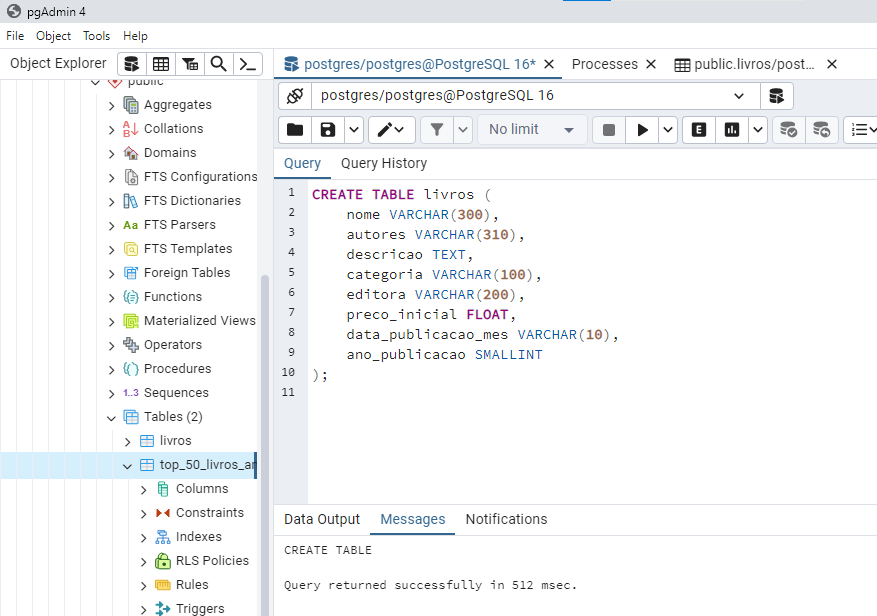

## Tabela com os dados
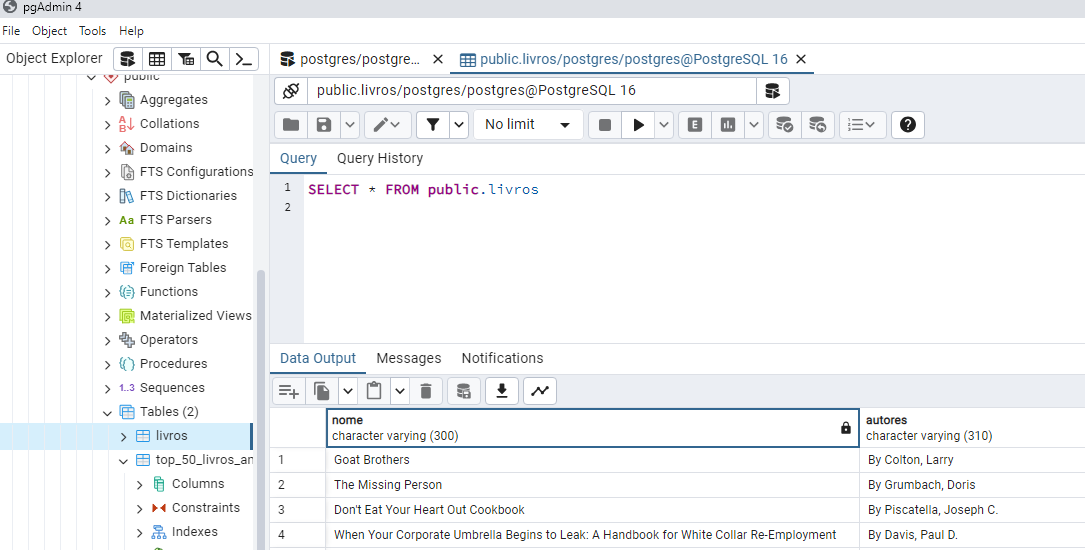

In [47]:
# Executando a consulta SQL usando a conexão SQLAlchemy
# Visão geral dos dados
pd.read_sql_query('SELECT * FROM livros', con=engine)

,nome,autores,descricao,categoria,editora,preco_inicial,data_publicacao_mes,ano_publicacao
0,Grieving the Loss of Someone You Love: Daily M...,"By Brookside, Lynn and Mitsch, Raymond L.",Few losses are as painful as the death of some...,"Self-help , Death, Grief, Bereavement",Regal,5.29,October,1993
1,McKettrick's Luck (McKettrick Men Series #1),"By Miller, Linda Lael",Like his celebrated ancestors who tamed the wi...,"Fiction , Romance , Western",Harlequin Books,5.29,January,2007
2,Eeyore Finds the Wolery,By A. A. Milne,None,None,Penguin,5.29,January,1992
3,Collins Gem Thesaurus,By HarperCollins Publishers,A pocket thesaurus arranged in an easy-to-use ...,"Reference , Dictionaries",Collins Reference,5.29,September,1991
4,The Bronze Bow,"By Speare, Elizabeth George","He trains my hands for war, so that my arms ca...","Young Adult Fiction , Historical , Prehistory",Clarion Books,5.29,September,1997
...,...,...,...,...,...,...,...,...
103058,A Search Is Organdized,By A. A. Milne,None,None,Penguin Putnam~childrens Hc,5.29,January,1992
103059,Tigger is Unbounced,By A.A. Milne,None,None,Dutton Books,5.29,January,1992
103060,Piglet Does a Very Grand Thing,By A. A. Milne,None,None,Dutton,4.99,January,1992
103061,Tigger Comes to the Forest and Has Breakfast,By A. A. Milne,None,None,Dutton Childrens Books,5.29,January,1992


### Verificando os valores nulos em categorias

In [48]:
query = """
SELECT COUNT(*) AS total_nulos_categoria
FROM livros
WHERE categoria IS NULL;"""

pd.read_sql_query(query, con=engine)

,total_nulos_categoria
0,26161


### Infelizmente, uma preocupação significativa é identificada em nosso conjunto de dados: um grande número de valores nulos na categoria. Com um total de 26161 registros sem categoria atribuída, essa lacuna pode ter implicações importantes, especialmente ao cruzar dados com tabelas como 'Top Livros Amazon'.

### Fazendo uma consulta simples para retornar os dados  das categorias da tabela 'livros' juntamente com os dados principais da 'tabela top_50_livros_amazon':

In [49]:
query = """SELECT top_50_livros_amazon.nome, ano, avaliacao_media, num_avaliacoes, categoria, ano_publicacao
FROM top_50_livros_amazon
LEFT JOIN livros ON top_50_livros_amazon.nome= livros.nome
ORDER BY avaliacao_media DESC
LIMIT 20;"""

pd.read_sql_query(query, con = engine)

,nome,ano,avaliacao_media,num_avaliacoes,categoria,ano_publicacao
0,Jesus Calling: Enjoying Peace in His Presence ...,2012,4.9,19576,"Religion , Christian Living , Inspirational",2004
1,"Brown Bear, Brown Bear, What Do You See?",2021,4.9,38969,"Juvenile Fiction , Concepts , Colors",1996
2,Jesus Calling: Enjoying Peace in His Presence ...,2014,4.9,19576,"Religion , Christian Living , Inspirational",2004
3,Jesus Calling: Enjoying Peace in His Presence ...,2013,4.9,19576,"Religion , Christian Living , Inspirational",2004
4,Little Blue Truck,2014,4.9,1884,"Juvenile Fiction , Transportation , Cars & Tr...",2009
5,"Brown Bear, Brown Bear, What Do You See?",2022,4.9,38969,"Juvenile Fiction , Concepts , Colors",1996
6,The Very Hungry Caterpillar,2022,4.9,47260,"Juvenile Fiction , Concepts , Counting & Numbers",1994
7,Jesus Calling: Enjoying Peace in His Presence ...,2015,4.9,19576,"Religion , Christian Living , Inspirational",2004
8,The Very Hungry Caterpillar,2021,4.9,47260,"Juvenile Fiction , Concepts , Counting & Numbers",1994
9,The Very Hungry Caterpillar,2018,4.9,19546,"Juvenile Fiction , Concepts , Counting & Numbers",1994


### Respondendo a pergunta 12, categorias que mais aparecem no geral:

In [50]:
query = """SELECT categoria, COUNT(*) AS quantidade_vezes
FROM top_50_livros_amazon
LEFT JOIN livros ON top_50_livros_amazon.nome = livros.nome
GROUP BY categoria
ORDER BY quantidade_vezes DESC
LIMIT 20;"""

pd.read_sql_query(query, con=engine)

,categoria,quantidade_vezes
0,None,563
1,"Juvenile Fiction , Concepts , Counting & Numbers",10
2,"Business & Economics , Development , General",9
3,"Juvenile Fiction , Fantasy & Magic",7
4,"Young Adult Fiction , Fantasy , General",7
5,"Fiction , Thrillers , Suspense",6
6,"Religion , Christian Living , Inspirational",6
7,"Fiction , Literary",6
8,"Fiction , Women",5
9,"Biography & Autobiography , Military",5


### A análise das categorias presentes em nosso conjunto de dados revela uma variedade de temas e gêneros literários, com algumas categorias se destacando em frequência. Vale ressaltar que a categoria 'None' é atribuída devido à presença significativa de valores nulos na coluna categoria do conjunto de dados 'livros'.
- Juvenile Fiction, Concepts, Counting & Numbers: Esta categoria aparece 10 vezes, indicando um foco em livros juvenis que exploram conceitos relacionados a contar e números, provavelmente destinados a educar crianças em idade pré-escolar sobre esses temas.
- Business & Economics, Development, General: Esta categoria é encontrada 9 vezes, sugerindo uma ênfase em livros que abordam questões de negócios, economia e desenvolvimento de forma geral.
- Juvenile Fiction, Fantasy & Magic: Com 7 ocorrências, esta categoria indica uma popularidade significativa de livros juvenis que envolvem elementos de fantasia e magia.
- Young Adult Fiction, Fantasy, General: Também com 7 ocorrências, esta categoria reflete o interesse contínuo em livros de ficção voltados para jovens adultos, especialmente aqueles que exploram mundos de fantasia.
- Fiction, Thrillers, Suspense: Encontrada 6 vezes, esta categoria sugere uma demanda por livros de ficção que oferecem suspense aos aos leitores.

## 13 - Quais as categorias mais frequentes em relação aos livros mais populares:

- Vamos utilizar as premissas usadas anteriormente os 25% mais bem avaliados e os 25% com maior número de avaliações;

In [51]:
query = """SELECT top_50_livros_amazon.nome, autor, avaliacao_media, num_avaliacoes,ano, genero, categoria
FROM top_50_livros_amazon
LEFT JOIN livros ON  top_50_livros_amazon.nome =  livros.nome
WHERE avaliacao_media >= 4.8 AND num_avaliacoes >= 23358
ORDER BY avaliacao_media
LIMIT 15;"""

pd.read_sql_query(query, con=engine)

,nome,autor,avaliacao_media,num_avaliacoes,ano,genero,categoria
0,The Nightingale: A Novel,Kristin Hannah,4.8,49288,2015,Fiction,None
1,Caste (Oprah's Book Club): The Origins of Our ...,Isabel Wilkerson,4.8,38318,2020,Non Fiction,None
2,What to Expect When You're Expecting,Heidi Murkoff,4.8,27052,2022,Non Fiction,"Family & Relationships , General"
3,What to Expect When You're Expecting,Heidi Murkoff,4.8,27052,2022,Non Fiction,"Family & Relationships , General"
4,"I Am Confident, Brave & Beautiful: A Coloring ...",Hopscotch Girls,4.8,29913,2020,Non Fiction,None
5,Caste (Oprah's Book Club): The Origins of Our ...,Isabel Wilkerson,4.8,38319,2021,Non Fiction,None
6,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,2012,Non Fiction,"Biography & Autobiography , Military"
7,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,2011,Non Fiction,"Biography & Autobiography , Military"
8,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,2010,Non Fiction,"Biography & Autobiography , Military"
9,What to Expect When You're Expecting,Heidi Murkoff,4.8,27052,2022,Non Fiction,"Health & Fitness , Pregnancy & Childbirth"


### Ao filtrarmos os 25% dos livros mais populares, encontramos uma variedade de categorias que refletem os diversos aspectos da preferência dos eleitores:

In [52]:
query = """ SELECT COALESCE(categoria, 'Desconhecida') AS categoria,
COUNT(*) AS contagem
FROM top_50_livros_amazon
LEFT JOIN livros ON top_50_livros_amazon.nome = livros.nome
WHERE avaliacao_media >= 4.8 AND num_avaliacoes >= 23358.0
GROUP BY COALESCE(categoria, 'Desconhecida')
ORDER BY contagem DESC;""" 

pd.read_sql_query(query, con=engine)

,categoria,contagem
0,Desconhecida,68
1,"Biography & Autobiography , Military",5
2,"Juvenile Fiction , Concepts , Colors",3
3,"Juvenile Fiction , Concepts , Counting & Numbers",3
4,"Family & Relationships , General",2
5,"Health & Fitness , Pregnancy & Childbirth",1


## 14 - Qual o ano de publicação que mais aparece:

In [53]:
query = """SELECT ano_publicacao, COUNT(*) AS quantidade_vezes
FROM top_50_livros_amazon
LEFT JOIN livros ON top_50_livros_amazon.nome = livros.nome
GROUP BY ano_publicacao
ORDER BY quantidade_vezes DESC;"""

pd.read_sql_query(query, con=engine)

,ano_publicacao,quantidade_vezes
0,NaN,557
1,2009.0,30
2,2010.0,28
3,2011.0,25
4,2007.0,23
5,2008.0,18
6,1994.0,10
7,2004.0,8
8,1996.0,7
9,1995.0,6


### Infelizmente muitos títulos em nossa tabela de livros não possuem o ano de publicação disponível, resultando em um número considerável de valores nulos. No entanto, mesmo diante dessa lacuna, podemos extrair algumas informações úteis sobre os anos de publicação dos livros que estão disponíveis.
### É interessante notar uma concentração particular nos anos mais recentes, como 2009, 2010 e 2011, sugerindo uma ênfase em obras contemporâneas. No entanto, também observamos a presença de alguns títulos mais antigos, como aqueles publicados em 1946, destacando a diversidade temporal presente em nosso conjunto de dados.

### Podemos corrigir os valores nulos simplesmente passando 'inner join', uma vez que,  ele retorna apenas os registros que têm correspondência nas duas tabelas que estão sendo unidas.

In [54]:
query = """SELECT ano_publicacao, COUNT(*) AS quantidade_vezes
FROM top_50_livros_amazon
INNER JOIN livros ON top_50_livros_amazon.nome = livros.nome
GROUP BY ano_publicacao
ORDER BY quantidade_vezes DESC;"""

pd.read_sql_query(query, con=engine)

,ano_publicacao,quantidade_vezes
0,2009,30
1,2010,28
2,2011,25
3,2007,23
4,2008,18
5,1994,10
6,2004,8
7,1996,7
8,1995,6
9,1982,5


### Mais query's:
- Colocando o ano e o mês de publicação em uma única coluna:

In [55]:
query = """SELECT *,
CONCAT (data_publicacao_mes, ' ', ano_publicacao) AS data_publicacao
FROM livros;"""

pd.read_sql_query(query, con = engine)

,nome,autores,descricao,categoria,editora,preco_inicial,data_publicacao_mes,ano_publicacao,data_publicacao
0,Grieving the Loss of Someone You Love: Daily M...,"By Brookside, Lynn and Mitsch, Raymond L.",Few losses are as painful as the death of some...,"Self-help , Death, Grief, Bereavement",Regal,5.29,October,1993,October 1993
1,McKettrick's Luck (McKettrick Men Series #1),"By Miller, Linda Lael",Like his celebrated ancestors who tamed the wi...,"Fiction , Romance , Western",Harlequin Books,5.29,January,2007,January 2007
2,Eeyore Finds the Wolery,By A. A. Milne,None,None,Penguin,5.29,January,1992,January 1992
3,Collins Gem Thesaurus,By HarperCollins Publishers,A pocket thesaurus arranged in an easy-to-use ...,"Reference , Dictionaries",Collins Reference,5.29,September,1991,September 1991
4,The Bronze Bow,"By Speare, Elizabeth George","He trains my hands for war, so that my arms ca...","Young Adult Fiction , Historical , Prehistory",Clarion Books,5.29,September,1997,September 1997
...,...,...,...,...,...,...,...,...,...
103058,A Search Is Organdized,By A. A. Milne,None,None,Penguin Putnam~childrens Hc,5.29,January,1992,January 1992
103059,Tigger is Unbounced,By A.A. Milne,None,None,Dutton Books,5.29,January,1992,January 1992
103060,Piglet Does a Very Grand Thing,By A. A. Milne,None,None,Dutton,4.99,January,1992,January 1992
103061,Tigger Comes to the Forest and Has Breakfast,By A. A. Milne,None,None,Dutton Childrens Books,5.29,January,1992,January 1992


In [56]:
# Se utilizarmos apenas um % o python interpretará como formatação de strings
# Assim, quando desejamos enviar % literalmente para o banco de dados em uma consulta SQL, precisamos usar '%%' 
# para que o Python escape o % e envie % para a consulta SQL.

query = """SELECT *
FROM LIVROS
WHERE autores like '%%Barack';"""

pd.read_sql_query(query, con = engine)

,nome,autores,descricao,categoria,editora,preco_inicial,data_publicacao_mes,ano_publicacao
0,The Audacity of Hope: Thoughts on Reclaiming t...,"By Obama, Barack","In July 2004, Barack Obama electrified the Dem...","Political Science , American Government , Leg...",Broadway Books,10.98,November,2007
1,The Audacity of Hope: Thoughts on Reclaiming t...,"By Obama, Barack","In July 2004, Barack Obama electrified the Dem...","Political Science , American Government , Leg...",Crown,4.99,October,2006
2,The Audacity of Hope: Thoughts on Reclaiming t...,"By Obama, Barack",The Audacity of Hope is Barack Obama's call fo...,"Biography & Autobiography , Presidents & Head...",Vintage,5.29,July,2008
3,Dreams from My Father: A Story of Race and Inh...,"By Obama, Barack","In this lyrical, unsentimental, and compelling...","Biography & Autobiography , Personal Memoirs",Crown,4.99,August,2004


### Ao analisarmos os dados, constatamos que o livro com o maior número de avaliações, "A Promised Land", não está incluído na tabela de livros. Isso levanta dúvidas sobre a representatividade da tabela de livros para a busca de informações gerais.

###  Infelizmente, também experimentamos outros dois conjuntos de dados, mas encontramos muitos campos em branco. Por essa razão, optamos por manter o conjunto de dados de 'livros' para nossas análises em conjunto com a tabela 'top_livros_amazon'.
